In [20]:
# metrics for noise model 1 (noisy_data)

# calculate the PSNR, SSIM, MSE and MAE between the original
# and the noisy images in:
# (original) ../TB_Chest_Radiography_Database/Normal and ../TB_Chest_Radiography_Database/Tuberculosis calculate
# (noisy) ../TB_Chest_Radiography_Database/Noise/Normal and ../TB_Chest_Radiography_Database/Noise/Tuberculosis

import os
import sys
import cv2
import csv
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr

# path to the original images
path_normal = '../TB_Chest_Radiography_Database/Normal'
path_tuberculosis = '../TB_Chest_Radiography_Database/Tuberculosis'

# path to the noisy images
path_normal_noise = '../TB_Chest_Radiography_Database/Noise/Normal'
path_tuberculosis_noise = '../TB_Chest_Radiography_Database/Noise/Tuberculosis'


def psnr_ssim_mse_mae(path_original, path_noisy):
    """
    calculate the PSNR, SSIM, MSE and MAE between the original
    and the noisy images in:
    (original) path_original
    (noisy) path_noisy
    :param path_original: path to the original images
    :param path_noisy: path to the noisy images
    :return: PSNR, SSIM, MSE and MAE
    """
    # read the original and the noisy images
    original = cv2.imread(path_original)
    noisy = cv2.imread(path_noisy)

    # convert the images to grayscale
    original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    noisy = cv2.cvtColor(noisy, cv2.COLOR_BGR2GRAY)

    # calculate the PSNR, SSIM, MSE and MAE
    psnr_value = psnr(original, noisy)
    ssim_value = ssim(original, noisy)
    mse_value = mse(original, noisy)
    mae_value = np.mean(np.abs(original - noisy))

    return psnr_value, ssim_value, mse_value, mae_value

# calculate the PSNR, SSIM, MSE and MAE for the normal images
# and save the results in a file
# and print the average
psnr_normal = []
ssim_normal = []
mse_normal = []
mae_normal = []

# do the same for the tuberculosis images, and add to metrics_noise.txt
psnr_tuberculosis = []
ssim_tuberculosis = []
mse_tuberculosis = []
mae_tuberculosis = []

# Define the CSV file path
csv_file = 'metrics_normal.csv'

# Open the CSV file in append mode
with open(csv_file, 'a', newline='') as f:
    writer = csv.writer(f)

    # Write the header row if the file is empty
    if f.tell() == 0:
        writer.writerow(['Filename','PSNR normal', 'SSIM normal', 'MSE normal', 'MAE normal'])

for filename in tqdm(os.listdir(path_normal)):
    psnr_value, ssim_value, mse_value, mae_value = psnr_ssim_mse_mae(os.path.join(path_normal, filename),
                                                                     os.path.join(path_normal_noise, filename))
    psnr_normal.append(psnr_value)
    ssim_normal.append(ssim_value)
    mse_normal.append(mse_value)
    mae_normal.append(mae_value)

    with open(csv_file, 'a', newline='') as f:
        writer = csv.writer(f)

        # Write the header row if the file is empty
        writer.writerow([filename, psnr_value, ssim_value, mse_value, mae_value])


for filename in tqdm(os.listdir(path_tuberculosis)):
    psnr_value, ssim_value, mse_value, mae_value = psnr_ssim_mse_mae(os.path.join(path_tuberculosis, filename),
                                                                     os.path.join(path_tuberculosis_noise, filename))
    psnr_tuberculosis.append(psnr_value)
    ssim_tuberculosis.append(ssim_value)
    mse_tuberculosis.append(mse_value)
    mae_tuberculosis.append(mae_value)

    with open(csv_file, 'a', newline='') as f:
        writer = csv.writer(f)

        # Write the header row if the file is empty
        writer.writerow([filename, psnr_value, ssim_value, mse_value, mae_value])


psnr = psnr_normal
ssim = ssim_normal
mse = mse_normal
mae = mae_normal

psnr.extend(psnr_tuberculosis)
ssim.extend(ssim_tuberculosis)
mse.extend(mse_tuberculosis)
mae.extend(mae_tuberculosis)

# summarize PSNR, SSIM, MSE and MAE
print('PSNR: mean=%.3f stdv=%.3f' % (np.mean(psnr), np.std(psnr)))
print('SSIM: mean=%.3f stdv=%.3f' % (np.mean(ssim), np.std(ssim)))
print('MSE: mean=%.3f stdv=%.3f' % (np.mean(mse), np.std(mse)))
print('MAE: mean=%.3f stdv=%.3f' % (np.mean(mae), np.std(mae)))



  0%|          | 0/3150 [00:00<?, ?it/s]

100%|██████████| 630/630 [00:15<00:00, 41.23it/s]

PSNR: mean=14.997 stdv=1.767
SSIM: mean=0.183 stdv=0.025
MSE: mean=2236.297 stdv=972.897
MAE: mean=102.742 stdv=23.497


In [1]:
# metrics for noise model 2 (more_noise)

# calculate the PSNR, SSIM, MSE and MAE between the original
# and the noisy images in:
# (original) ../TB_Chest_Radiography_Database/Normal and ../TB_Chest_Radiography_Database/Tuberculosis calculate
# (noisy) ../TB_Chest_Radiography_Database/Noise/Normal and ../TB_Chest_Radiography_Database/Noise/Tuberculosis

import os
import sys
import cv2
import csv
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr

# path to the original images
path_normal = '../TB_Chest_Radiography_Database/Normal'
path_tuberculosis = '../TB_Chest_Radiography_Database/Tuberculosis'

# path to the noisy images
path_normal_noise = '../TB_Chest_Radiography_Database/More_Noise/Normal'
path_tuberculosis_noise = '../TB_Chest_Radiography_Database/More_Noise/Tuberculosis'


def psnr_ssim_mse_mae(path_original, path_noisy):
    """
    calculate the PSNR, SSIM, MSE and MAE between the original
    and the noisy images in:
    (original) path_original
    (noisy) path_noisy
    :param path_original: path to the original images
    :param path_noisy: path to the noisy images
    :return: PSNR, SSIM, MSE and MAE
    """
    # read the original and the noisy images
    original = cv2.imread(path_original)
    noisy = cv2.imread(path_noisy)

    # convert the images to grayscale
    original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    noisy = cv2.cvtColor(noisy, cv2.COLOR_BGR2GRAY)

    # calculate the PSNR, SSIM, MSE and MAE
    psnr_value = psnr(original, noisy)
    ssim_value = ssim(original, noisy)
    mse_value = mse(original, noisy)
    mae_value = np.mean(np.abs(original - noisy))

    return psnr_value, ssim_value, mse_value, mae_value

# calculate the PSNR, SSIM, MSE and MAE for the normal images
# and save the results in a file
# and print the average
psnr_normal = []
ssim_normal = []
mse_normal = []
mae_normal = []

# do the same for the tuberculosis images, and add to metrics_noise.txt
psnr_tuberculosis = []
ssim_tuberculosis = []
mse_tuberculosis = []
mae_tuberculosis = []

# Define the CSV file path
csv_file = 'metrics_more_noise.csv'

# Open the CSV file in append mode
with open(csv_file, 'a', newline='') as f:
    writer = csv.writer(f)

    # Write the header row if the file is empty
    if f.tell() == 0:
        writer.writerow(['Filename','PSNR normal', 'SSIM normal', 'MSE normal', 'MAE normal'])

for filename in tqdm(os.listdir(path_normal)):
    psnr_value, ssim_value, mse_value, mae_value = psnr_ssim_mse_mae(os.path.join(path_normal, filename),
                                                                     os.path.join(path_normal_noise, filename))
    psnr_normal.append(psnr_value)
    ssim_normal.append(ssim_value)
    mse_normal.append(mse_value)
    mae_normal.append(mae_value)

    with open(csv_file, 'a', newline='') as f:
        writer = csv.writer(f)

        # Write the header row if the file is empty
        writer.writerow([filename, psnr_value, ssim_value, mse_value, mae_value])


for filename in tqdm(os.listdir(path_tuberculosis)):
    psnr_value, ssim_value, mse_value, mae_value = psnr_ssim_mse_mae(os.path.join(path_tuberculosis, filename),
                                                                     os.path.join(path_tuberculosis_noise, filename))
    psnr_tuberculosis.append(psnr_value)
    ssim_tuberculosis.append(ssim_value)
    mse_tuberculosis.append(mse_value)
    mae_tuberculosis.append(mae_value)

    with open(csv_file, 'a', newline='') as f:
        writer = csv.writer(f)

        # Write the header row if the file is empty
        writer.writerow([filename, psnr_value, ssim_value, mse_value, mae_value])


psnr = psnr_normal
ssim = ssim_normal
mse = mse_normal
mae = mae_normal

psnr.extend(psnr_tuberculosis)
ssim.extend(ssim_tuberculosis)
mse.extend(mse_tuberculosis)
mae.extend(mae_tuberculosis)

# summarize PSNR, SSIM, MSE and MAE
print('PSNR: mean=%.3f stdv=%.3f' % (np.mean(psnr), np.std(psnr)))
print('SSIM: mean=%.3f stdv=%.3f' % (np.mean(ssim), np.std(ssim)))
print('MSE: mean=%.3f stdv=%.3f' % (np.mean(mse), np.std(mse)))
print('MAE: mean=%.3f stdv=%.3f' % (np.mean(mae), np.std(mae)))



100%|██████████| 630/630 [00:17<00:00, 36.65it/s]

PSNR: mean=13.812 stdv=1.440
SSIM: mean=0.129 stdv=0.015
MSE: mean=2857.490 stdv=1018.415
MAE: mean=111.692 stdv=21.636


In [18]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr

def psnr_ssim_mse_mae(original, noisy):
    """
    calculate the PSNR, SSIM, MSE and MAE between the original
    and the noisy images.
    :param original: the original image
    :param noisy: the noisy image
    :return: PSNR, SSIM, MSE and MAE
    """
    # Convert the images to 32-bit float
    original = original.astype(np.float32)
    noisy = noisy.astype(np.float32)

    # convert the images to grayscale
    original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    noisy = cv2.cvtColor(noisy, cv2.COLOR_BGR2GRAY)

    # calculate the PSNR, SSIM, MSE and MAE
    psnr_value = psnr(original, noisy)
    ssim_value = ssim(original, noisy, data_range=original.max() - original.min())
    mse_value = mse(original, noisy)
    mae_value = np.mean(np.abs(original - noisy))

    return psnr_value, ssim_value, mse_value, mae_value

In [20]:
def psnr_ssim_mse_mae(path_original, path_noisy):
    """
    calculate the PSNR, SSIM, MSE and MAE between the original
    and the noisy images in:
    (original) path_original
    (noisy) path_noisy
    :param path_original: path to the original images
    :param path_noisy: path to the noisy images
    :return: PSNR, SSIM, MSE and MAE
    """
    # read the original and the noisy images
    original = cv2.imread(path_original)
    noisy = cv2.imread(path_noisy)

    # convert the images to grayscale
    original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    noisy = cv2.cvtColor(noisy, cv2.COLOR_BGR2GRAY)

    # calculate the PSNR, SSIM, MSE and MAE
    psnr_value = psnr(original, noisy)
    ssim_value = ssim(original, noisy)
    mse_value = mse(original, noisy)
    mae_value = np.mean(np.abs(original - noisy))

    return psnr_value, ssim_value, mse_value, mae_value

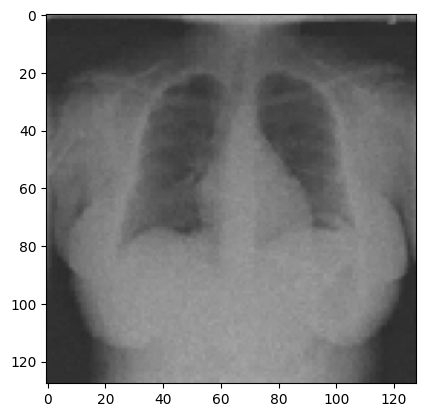

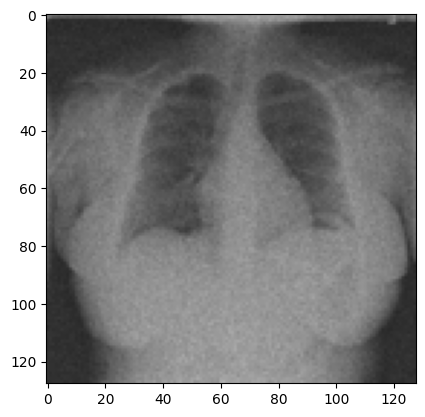

PSNR: 66.026
SSIM: 1.000
MSE: 0.016
MAE: 2.063


In [22]:
# read the first image from the file 4_changing_cnn_model/X_denoised.npy and display it
image = np.load('../4_changing_cnn_model/X_denoised.npy')[0]
plt.imshow(image, cmap='gray')
plt.show()

# save the image as a png file
cv2.imwrite('denoised_eg.png', image)

# read the first image from the file 2_training_with_noise/X.npy and display it
image_noisy = np.load('../2_training_with_noise/X.npy')[0]
plt.imshow(image_noisy, cmap='gray')
plt.show()

# save the image as a png file
cv2.imwrite('noisy_eg.png', image_noisy)

# run the psnr_ssim_mse_mae function for the two image files
psnr_value, ssim_value, mse_value, mae_value = psnr_ssim_mse_mae('noisy_eg.png', 'denoised_eg.png')
print('PSNR: %.3f' % psnr_value)
print('SSIM: %.3f' % ssim_value)
print('MSE: %.3f' % mse_value)
print('MAE: %.3f' % mae_value)


In [ ]:
# for every image in 2_training_with_noise/X.npy and the corresponding image in 4_changing_cnn_model/X_denoised.npy
# and every image in 2_training_with_more_noise/X_test.npy and the corresponding image in 4_changing_cnn_model/X_denoised_test.npy:
#       1) save the image to a png file 
#       2) run the psnr_ssim_mse_mae function for the two image files
#       3) save the results to metrics_wavelet.csv
#       4) calculate the mean and std deviation of the metrics

import os
import sys
import cv2
import csv
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr

for i, image in tqdm(enumerate(np.load('../4_changing_cnn_model/X_denoised_test.npy'))):
    cv2.imwrite('denoised_images/image_' + i + '.png', image)

for i, image in tqdm(enumerate(np.load('../4_changing_cnn_model/X_denoised.npy'))):
    cv2.imwrite('denoised_images_test/image_test_' + i + '.png', image)

for i, image in tqdm(enumerate(np.load('../2_training_with_noise/X_no_noise.npy'))):
    cv2.imwrite('original_images/image_' + i + '.png', image)

for i, image in tqdm(enumerate(np.load('../2_training_with_noise/X_no_noise_test.npy'))):
    cv2.imwrite('original_images_test/image_test_' + i + '.png', image)

# for every image in denoised_images and the corresponding image in original_images, calculate the psnr_ssim_mse_mae
# and save the results to metrics_wavelet.csv

csv_file = 'metrics_normal.csv'

with open(csv_file, 'a', newline='') as f:
    writer = csv.writer(f)

    if f.tell() == 0:
        writer.writerow(['Filename','PSNR', 'SSIM', 'MSE', 'MAE'])


psnr_wavelet = []
ssim_wavelet = []
mse_wavelet = []
mae_wavelet = []

for filename in tqdm(os.listdir('denoised_images')):
    psnr_value, ssim_value, mse_value, mae_value = psnr_ssim_mse_mae(os.path.join('denoised_images', filename),
                                                                     os.path.join('original_images', filename))
    psnr_wavelet.append(psnr_value)
    ssim_wavelet.append(ssim_value)
    mse_wavelet.append(mse_value)
    mae_wavelet.append(mae_value)

    with open(csv_file, 'a', newline='') as f:
        writer = csv.writer(f)

        # Write the header row if the file is empty
        writer.writerow([filename, psnr_value, ssim_value, mse_value, mae_value])


# for every image in denoised_images_test and the corresponding image in original_images_test, calculate the psnr_ssim_mse_mae
# and save the results to metrics_wavelet.csv

for filename in tqdm(os.listdir('denoised_images_test')):
    psnr_value, ssim_value, mse_value, mae_value = psnr_ssim_mse_mae(os.path.join('denoised_images_test', filename),
                                                                     os.path.join('original_images_test', filename))
    psnr_wavelet.append(psnr_value)
    ssim_wavelet.append(ssim_value)
    mse_wavelet.append(mse_value)
    mae_wavelet.append(mae_value)

    with open(csv_file, 'a', newline='') as f:
        writer = csv.writer(f)

        # Write the header row if the file is empty
        writer.writerow([filename, psnr_value, ssim_value, mse_value, mae_value])

# summarize PSNR, SSIM, MSE and MAE
print('PSNR: mean=%.3f stdv=%.3f' % (np.mean(psnr_wavelet), np.std(psnr_wavelet)))
print('SSIM: mean=%.3f stdv=%.3f' % (np.mean(ssim_wavelet), np.std(ssim_wavelet)))
print('MSE: mean=%.3f stdv=%.3f' % (np.mean(mse_wavelet), np.std(mse_wavelet)))
print('MAE: mean=%.3f stdv=%.3f' % (np.mean(mae_wavelet), np.std(mae_wavelet)))

In [ ]:
# metrics for nlm denoising model

